In [1]:
var openDigger = require('../src/open_digger');
var year = 2022, startYear = 2018;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2018, 2019, 2020, 2021, 2022]
var chineseLabel = openDigger.label.getGitHubData([':regions/CN']);
var americaLabel = openDigger.label.getGitHubData([':regions/US']);

# 2023 中国开源发展蓝皮书

## 总体情况

## 全球

通过统计全域 GitHub 事件日志，可以看到近 5 年全球开源的总体活跃情况，各项指标都在明显上升，特别是疫情后，有一个加速上升的趋势。同时活跃仓库数量目前保持着大约 24% 左右的增速，显示了全球开源发展中的增速。

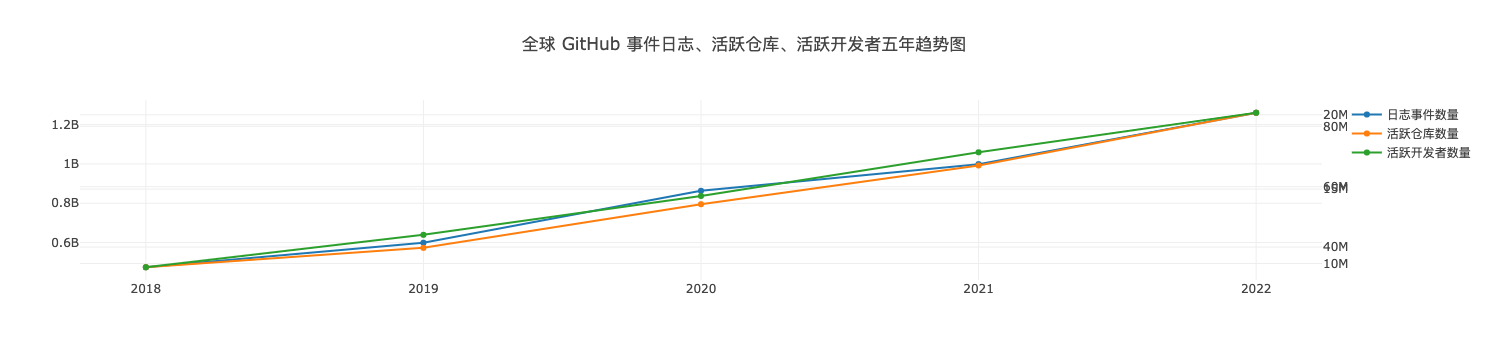

In [2]:
openDigger.driver.clickhouse.query(`SELECT COUNT() AS event_count, COUNT(DISTINCT repo_id) AS active_repo_count, COUNT(DISTINCT actor_id) AS active_actor_count, toYear(created_at) AS year
FROM gh_events WHERE year >= ${startYear} AND year <= ${year} GROUP BY year ORDER BY year`, { format: 'JSONEachRow' }).then(data => {
    var eventCount = [], activeRepoCount = [], activeActorCount = [];
    data.forEach(d => {
        eventCount.push(d.event_count);
        activeRepoCount.push(d.active_repo_count);
        activeActorCount.push(d.active_actor_count);
    });
    openDigger.render.plotly([
        {x: years, y: eventCount, mode: 'scatter', name: '日志事件数量'},
        {x: years, y: activeRepoCount, mode: 'scatter', name: '活跃仓库数量', yaxis: 'y2'},
        {x: years, y: activeActorCount, mode: 'scatter', name: '活跃开发者数量', yaxis: 'y3'},
    ], {
        title: '全球 GitHub 事件日志、活跃仓库、活跃开发者五年趋势图',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        yaxis3: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
});

### 中国

此节包含近五年中国项目在 GitHub 日志的事件总量、活跃仓库数量、活跃在中国项目上的开发者总量的变化趋势。

在经历了疫情前后的快速增长后，开始处于一个稳定的增长期。中国在2022年的日志事件和活跃仓库数均有明显的增长，相信在国家各项政策性意见的出台下，中国开源的发展会越来越好。

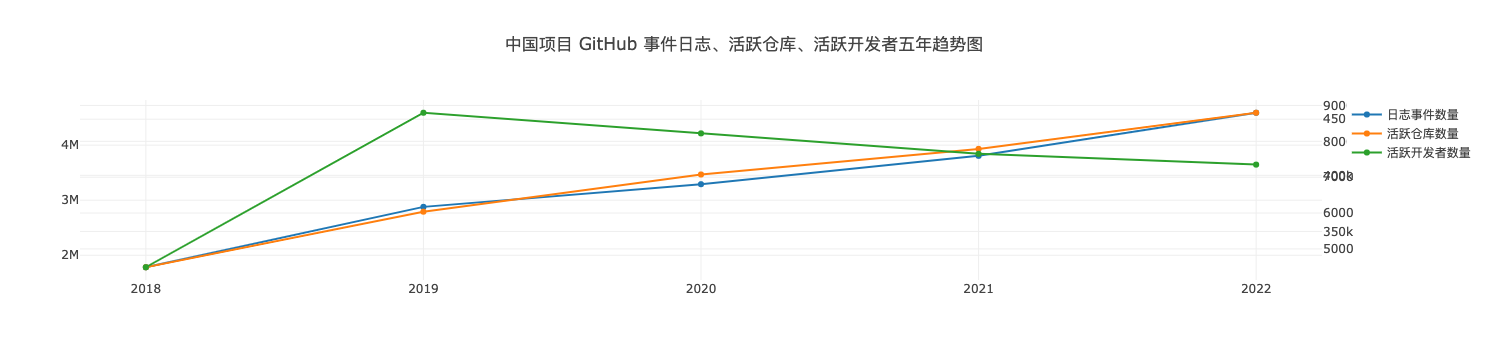

In [3]:
openDigger.driver.clickhouse.query(`SELECT COUNT() AS event_count, COUNT(DISTINCT repo_id) AS active_repo_count, COUNT(DISTINCT actor_id) AS active_actor_count, toYear(created_at) AS year
FROM gh_events WHERE year >= ${startYear} AND year <= ${year} AND (repo_id IN [${chineseLabel.githubRepos.join(',')}] OR org_id IN [${chineseLabel.githubOrgs.join(',')}]) GROUP BY year ORDER BY year`, { format: 'JSONEachRow' }).then(data => {
    var eventCount = [], activeRepoCount = [], activeActorCount = [];
    data.forEach(d => {
        eventCount.push(d.event_count);
        activeRepoCount.push(d.active_repo_count);
        activeActorCount.push(d.active_actor_count);
    });
    openDigger.render.plotly([
        {x: years, y: eventCount, mode: 'scatter', name: '日志事件数量'},
        {x: years, y: activeRepoCount, mode: 'scatter', name: '活跃仓库数量', yaxis: 'y2'},
        {x: years, y: activeActorCount, mode: 'scatter', name: '活跃开发者数量', yaxis: 'y3'},
    ], {
        title: '中国项目 GitHub 事件日志、活跃仓库、活跃开发者五年趋势图',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        yaxis3: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
});

## 中美企业对比

为了更好的展现中国企业在全球范围下的开源贡献整体水平，本报告通过对比美国头部企业参与开源贡献的数据来进行分析，四张表分别为：美国活跃度排名前十的开源贡献企业、中国活跃度排名前十的开源贡献企业、美国开源影响力排名前十的企业、以及中国开源影响力排名前十的企业，可以看到：

- 美国的传统互联网大企业任然是活跃度与影响力排名靠前的主要来源。微软由于已使用 GitHub 作为大部分团队的日常开发平台，故项目数量较大，总活跃度第一，与第二名Google的差距逐渐拉大；著名的开源独角兽公司 HashiCorp 也榜上有名。
- 中国的情况则是阿里巴巴的项目数量和总活跃度均为国内企业第一，但整体项目体量以及活跃度总量距离美国 Google 等大企业还有一定的差距；而中国的开源初创企业和项目则表现抢眼，按照项目平均活跃度，可以看到如 PingCAP（tidb，tikv）、Baidu（PaddlePaddle）、QingCloud（KubeSphere）、StarRocks（StarRocks）都脱颖而出。
- 从活跃度指标总的来看，虽然体量上中国和美国有一定的差距，但在项目平均活跃度上则水平相当，因此中国需要继续大力培育孵化好的开源项目。
- 影响力指标更关注开发者生态，在影响力指标下，大体趋势和活跃度指标下的一样，体量上中美存在一定差距，在项目平均影响力上则相当，中国企业映云科技(EMQ)脱颖而出，该公司成立于2017年，其主要的开源项目 emqx 有着相当不错的开发者生态。

进一步，本报告也详细分析了中国企业近 5 年的开源发展趋势，包括活跃度趋势与影响力趋势。可以看到阿里巴巴、百度、蚂蚁三家企业长期名列前茅；阿里长期排名榜首，而百度近几年也明显加大了对开源贡献的投入，初创企业 PingCAP 也是一直稳居第四的位置，需要注意的是鼎石科技（StarRocks）在2021年上榜并在2022年达到第8位，其下开源项目StarRocks数据库影响力不容忽视。

### 美国企业活跃度 Top 10

In [4]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':regions/US'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC',
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '年度活跃度': d.activity[0],
        };
    }));
})

┌─────────┬──────┬─────────────┬────────────┐
│ (index) │ 排名 │    公司     │ 年度活跃度 │
├─────────┼──────┼─────────────┼────────────┤
│    0    │  1   │ 'Microsoft' │ 824848.67  │
│    1    │  2   │  'Google'   │ 360300.45  │
│    2    │  3   │  'Amazon'   │  281973.9  │
│    3    │  4   │   'Meta'    │  155230.8  │
│    4    │  5   │ 'HashiCorp' │ 102213.21  │
│    5    │  6   │  'Elastic'  │  98408.28  │
│    6    │  7   │  'VMWare'   │  85970.99  │
│    7    │  8   │    'IBM'    │  72074.49  │
│    8    │  9   │  'Mozilla'  │  60860.44  │
│    9    │  10  │   'Intel'   │  51863.52  │
└─────────┴──────┴─────────────┴────────────┘


### 中国企业活跃度 Top 10

按照项目平均活跃度，可以看到如 PingCAP（tidb，tikv）、Baidu（PaddlePaddle）、QingCloud（KubeSphere）、StarRocks（StarRocks）都脱颖而出，而阿里巴巴的项目数量和总活跃度均为国内企业第一。

In [5]:
openDigger.index.activity.getRepoActivity({
    labelIntersect: [':regions/CN', 'Company'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC'
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '年度活跃度': d.activity[0],
        };
    }));
})

┌─────────┬──────┬─────────────┬────────────┐
│ (index) │ 排名 │    公司     │ 年度活跃度 │
├─────────┼──────┼─────────────┼────────────┤
│    0    │  1   │  'Alibaba'  │ 103368.49  │
│    1    │  2   │   'Baidu'   │  71636.82  │
│    2    │  3   │ 'Ant group' │  61897.32  │
│    3    │  4   │  'PingCAP'  │  48527.89  │
│    4    │  5   │  'Tencent'  │  39080.82  │
│    5    │  6   │ 'ESPRESSIF' │  20497.65  │
│    6    │  7   │ 'Fit2Cloud' │  13871.88  │
│    7    │  8   │ 'StarRocks' │  12752.25  │
│    8    │  9   │  'Deepin'   │  12033.71  │
│    9    │  10  │ 'QingCloud' │  11759.72  │
└─────────┴──────┴─────────────┴────────────┘


### 美国企业影响力 Top 10

可以看出微软公司的企业影响力远大于其它公司。

In [6]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':regions/US'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC',
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '影响力': d.openrank[0],
        };
    }));
})

┌─────────┬──────┬─────────────┬───────────┐
│ (index) │ 排名 │    公司     │  影响力   │
├─────────┼──────┼─────────────┼───────────┤
│    0    │  1   │ 'Microsoft' │ 298240.46 │
│    1    │  2   │  'Google'   │ 133325.95 │
│    2    │  3   │  'Amazon'   │ 84184.94  │
│    3    │  4   │   'Meta'    │ 55547.13  │
│    4    │  5   │ 'HashiCorp' │ 31132.45  │
│    5    │  6   │  'Elastic'  │ 28798.78  │
│    6    │  7   │  'VMWare'   │   24575   │
│    7    │  8   │    'IBM'    │ 19514.88  │
│    8    │  9   │  'Mozilla'  │ 17910.99  │
│    9    │  10  │   'Intel'   │ 13096.74  │
└─────────┴──────┴─────────────┴───────────┘


### 中国企业影响力 Top 10

影响力指标更关注开发者生态，在影响力指标下，中国企业映云科技(EMQ)脱颖而出，该公司成立于2017年，其主要的开源项目 emqx 有着相当不错的开发者生态。

In [7]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: [':regions/CN', 'Company'],
    startYear: year, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year',
    order: 'DESC',
}).then(data => {
    console.table(data.map((d, i) => {
        return {
            '排名': i + 1,
            '公司': d.name,
            '影响力': d.openrank[0],
        };
    }));
})

┌─────────┬──────┬─────────────┬──────────┐
│ (index) │ 排名 │    公司     │  影响力  │
├─────────┼──────┼─────────────┼──────────┤
│    0    │  1   │  'Alibaba'  │ 32819.89 │
│    1    │  2   │   'Baidu'   │ 25248.77 │
│    2    │  3   │ 'Ant group' │ 21772.16 │
│    3    │  4   │  'Tencent'  │ 12246.12 │
│    4    │  5   │  'PingCAP'  │ 9939.91  │
│    5    │  6   │ 'ESPRESSIF' │ 7267.35  │
│    6    │  7   │ 'Fit2Cloud' │ 5993.79  │
│    7    │  8   │ 'QingCloud' │ 3254.64  │
│    8    │  9   │  'Huawei'   │ 3172.87  │
│    9    │  10  │    'EMQ'    │ 2929.85  │
└─────────┴──────┴─────────────┴──────────┘


### 近五年中国企业活跃度 Top 10

可以看到阿里巴巴、百度、蚂蚁三家企业长期名列前茅；初创企业 PingCAP 也是一直稳居第四的位置，需要注意的是鼎石科技（StarRocks）在2021年上榜并在2022年达到第8位，其下开源项目StarRocks数据库影响力不容忽视。

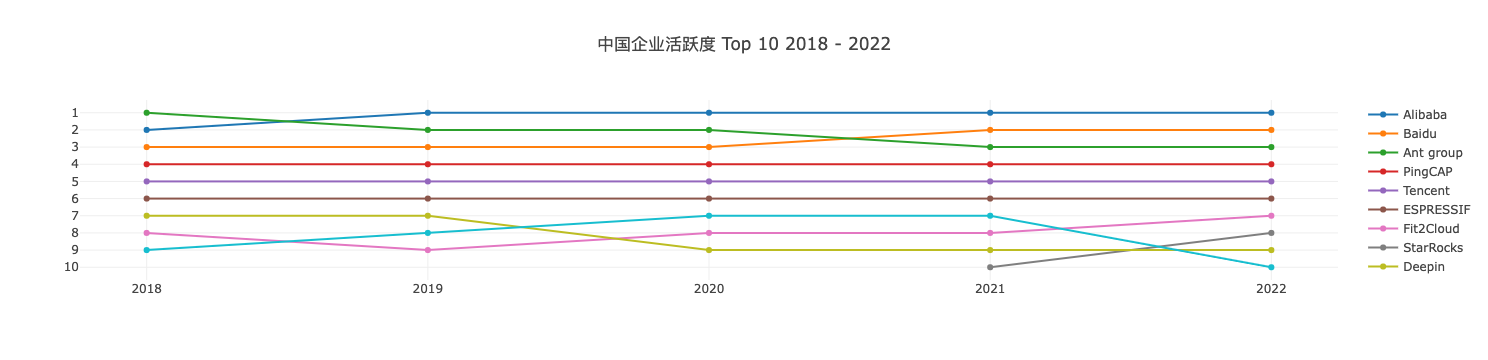

In [8]:
openDigger.index.activity.getRepoActivity({
    labelIntersect: [':regions/CN', 'Company'],
    startYear, endYear: year, endMonth: 12,
    groupBy: 'Company', groupTimeRange: 'year', order: 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.activity).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }) , {title: `中国企业活跃度 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 } })
})

### 近五年中国企业影响力 Top 10

在影响力方面，Tencent常年位居第4位，飞致云上升到第8位。

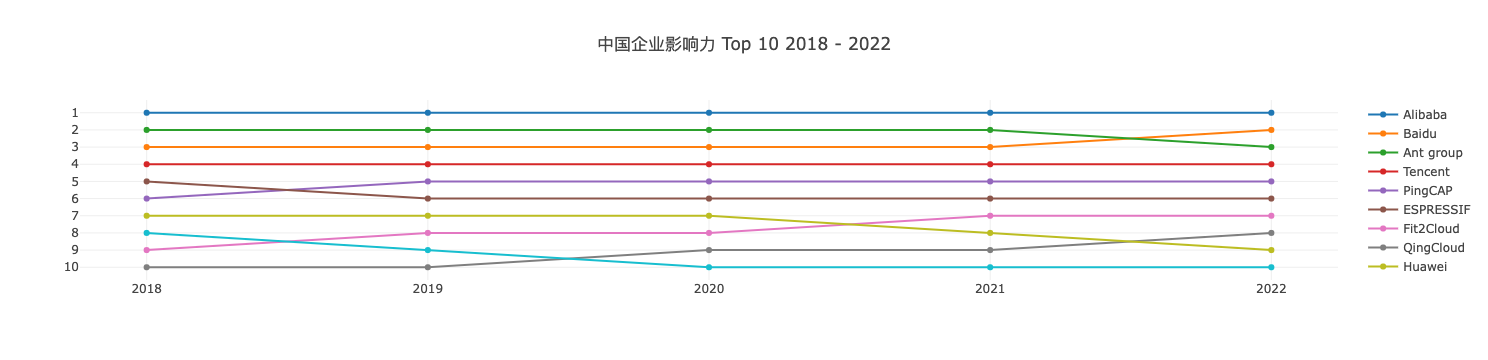

In [9]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: [':regions/CN', 'Company'],
    startYear, endYear: year,
    endMonth: 12, groupBy: 'Company',
    groupTimeRange: 'year', order : 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.openrank).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }),{title: `中国企业影响力 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 } })
})

## 中国项目情况

在开源项目洞察这块，同样根据活跃度和影响力，分别比较了全球和中国排名前 20 的开源项目，可以看到：

- 在单个项目上，中国主导的开源项目的活跃度和影响力距离全球顶级开源项目的活跃度与影响力还有一定的差距，特别是在影响力方面，是一个需要长期建设的生态指标，需要我们最大限度的融入到全球开源生态里面发展我国的开源项目。
- 中国主导的开源项目中，来自百度的 PaddlePaddle 相关的两个项目保持上升 活跃度与影响力均位列第一，pingCAP 旗下的两个开源项目（TiDB、TiKV）与 StarRocks旗下的StarRocks数据库则表现不俗。
- 在近 5 年的变化趋势上，活跃度方面，PaddlePaddle 相关的两个项目保持上升；影响力方面，shardingsphere 和 metersphere 则稳步上升。 

### GitHub 全球项目活跃度 Top 20

In [10]:
openDigger.index.activity.getRepoActivity({
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        activity: d.activity[0],
        issue_comment: d.issue_comment[0],
        open_issue: d.open_issue[0],
        open_pull: d.open_pull[0],
        review_comment: d.review_comment[0],
        merged_pull: d.merged_pull[0],
    };
})));

┌─────────┬──────────────────────────────────────────┬──────────┬───────────────┬────────────┬───────────┬────────────────┬─────────────┐
│ (index) │                   name                   │ activity │ issue_comment │ open_issue │ open_pull │ review_comment │ merged_pull │
├─────────┼──────────────────────────────────────────┼──────────┼───────────────┼────────────┼───────────┼────────────────┼─────────────┤
│    0    │             'NixOS/nixpkgs'              │ 53246.42 │    '95453'    │   '4352'   │  '47637'  │    '40637'     │   '41047'   │
│    1    │          'home-assistant/core'           │ 48792.23 │    '93029'    │   '8844'   │  '11443'  │    '32187'     │   '10149'   │
│    2    │            'microsoft/vscode'            │ 44532.91 │    '82879'    │  '20937'   │  '6444'   │     '4525'     │   '5712'    │
│    3    │            'flutter/flutter'             │ 37779.17 │    '85213'    │  '12651'   │  '7511'   │    '12892'     │   '5475'    │
│    4    │        'MicrosoftDocs/

### GitHub 中国项目活跃度 Top 20

In [11]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':regions/CN'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        activity: d.activity[0],
        issue_comment: d.issue_comment[0],
        open_issue: d.open_issue[0],
        open_pull: d.open_pull[0],
        review_comment: d.review_comment[0],
        merged_pull: d.merged_pull[0],
    };
})));

┌─────────┬───────────────────────────┬──────────┬───────────────┬────────────┬───────────┬────────────────┬─────────────┐
│ (index) │           name            │ activity │ issue_comment │ open_issue │ open_pull │ review_comment │ merged_pull │
├─────────┼───────────────────────────┼──────────┼───────────────┼────────────┼───────────┼────────────────┼─────────────┤
│    0    │   'PaddlePaddle/Paddle'   │ 16225.22 │    '22996'    │   '1800'   │  '8280'   │    '12802'     │   '6184'    │
│    1    │      'pingcap/tidb'       │ 10846.57 │    '57692'    │   '3239'   │  '5170'   │    '10352'     │   '3618'    │
│    2    │   'StarRocks/starrocks'   │ 10128.47 │    '36487'    │   '3195'   │  '9343'   │    '13237'     │   '7837'    │
│    3    │  'ant-design/ant-design'  │ 9926.18  │    '19708'    │   '2625'   │  '2722'   │     '3146'     │   '2087'    │
│    4    │      'apache/flink'       │ 8366.16  │    '11640'    │    '0'     │  '3083'   │    '13158'     │   '1634'    │
│    5    │     

### GitHub 全球项目影响力 Top 20

In [12]:
openDigger.index.openrank.getRepoOpenrank({
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        open_rank: d.openrank[0],
    };
})));

┌─────────┬──────────────────────────────────────────┬───────────┐
│ (index) │                   name                   │ open_rank │
├─────────┼──────────────────────────────────────────┼───────────┤
│    0    │          'home-assistant/core'           │ 26332.83  │
│    1    │             'NixOS/nixpkgs'              │ 23142.31  │
│    2    │            'microsoft/vscode'            │ 19611.98  │
│    3    │            'flutter/flutter'             │ 18573.61  │
│    4    │        'MicrosoftDocs/azure-docs'        │ 15303.25  │
│    5    │             'dotnet/runtime'             │ 14924.08  │
│    6    │            'pytorch/pytorch'             │ 13978.85  │
│    7    │               'odoo/odoo'                │ 12855.24  │
│    8    │    'element-fi/elf-council-frontend'     │ 10999.73  │
│    9    │           'godotengine/godot'            │ 10695.72  │
│   10    │             'rust-lang/rust'             │ 10575.58  │
│   11    │             'elastic/kibana'             │ 10462.5

### GitHub 中国项目影响力 Top 20

In [13]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':regions/CN'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 20, order: 'DESC',
}).then(data => console.table(data.map(d => {
    return {
        name: d.name,
        open_rank: d.openrank[0],
    };
})));

┌─────────┬───────────────────────────┬───────────┐
│ (index) │           name            │ open_rank │
├─────────┼───────────────────────────┼───────────┤
│    0    │   'PaddlePaddle/Paddle'   │  5791.81  │
│    1    │  'ant-design/ant-design'  │  4370.81  │
│    2    │  'apache/shardingsphere'  │  2900.41  │
│    3    │      'apache/pulsar'      │  2796.98  │
│    4    │      'pingcap/tidb'       │  2538.82  │
│    5    │ 'metersphere/metersphere' │  2527.71  │
│    6    │ 'PaddlePaddle/PaddleOCR'  │  2438.73  │
│    7    │    'espressif/esp-idf'    │  2417.05  │
│    8    │      'apache/flink'       │  2412.77  │
│    9    │       'apache/tvm'        │  2169.45  │
│   10    │ 'open-mmlab/mmdetection'  │  2162.91  │
│   11    │ 'apache/dolphinscheduler' │  2115.84  │
│   12    │    'taosdata/TDengine'    │  2069.33  │
│   13    │      'apache/doris'       │  1996.13  │
│   14    │      'alibaba/nacos'      │  1914.68  │
│   15    │      'apache/apisix'      │  1863.27  │
│   16    │ 

### 近五年中国活跃度 Top 10 项目变化趋势图

可以看出 Paddle 项目上升至第 1，tidb 上升至第 2，StarRocks 得益于其良好的开源生态以及全球的推广，在 2021 年上榜，并 2022 年直接上升至第 3 位，

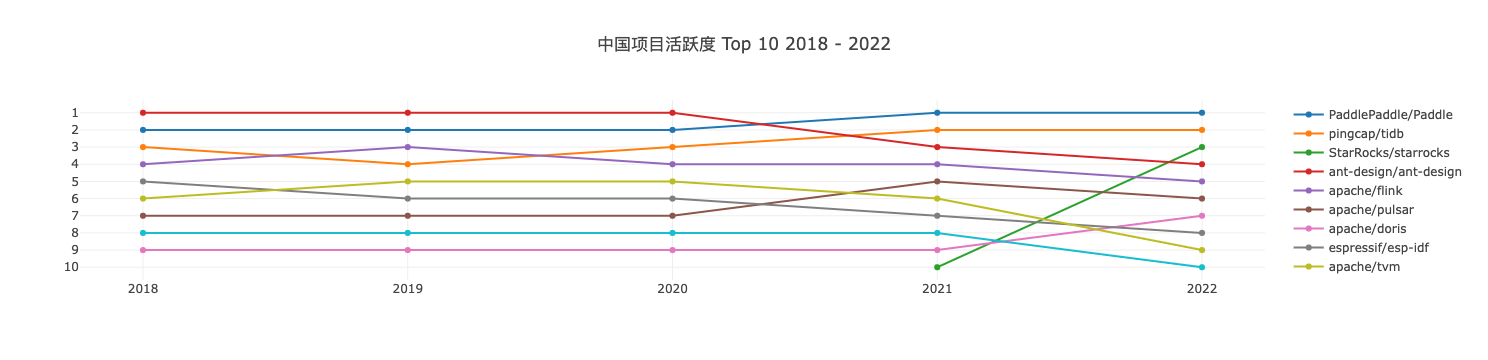

In [14]:
openDigger.index.activity.getRepoActivity({
    labelUnion: [':regions/CN'],
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.activity).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }) , {title: `中国项目活跃度 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 }  })
});

### 近五年中国影响力 Top 10 项目变化趋势图

PaddleOCR 在 2020 年开源以来，活跃度和影响力都飞速进步，很快就进入了顶级项目行列。同样，metersphere 自 2020 年上榜以来影响力逐渐上升。从下图中同样可以看出 2020 年以来项目影响力竞争激烈，反映出中国开源项目积极的发展。

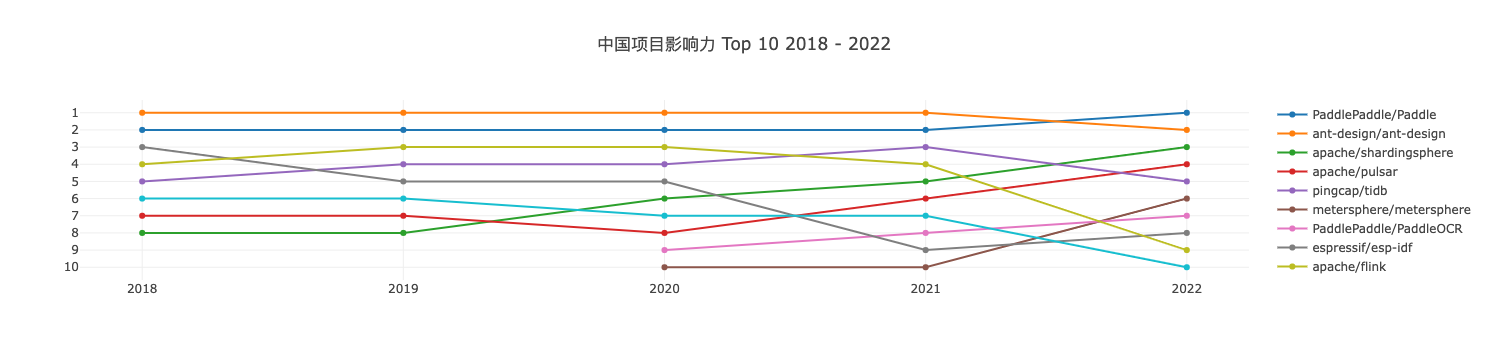

In [15]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':regions/CN'],
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => {
    openDigger.render.plotly(openDigger.getRank(data, d => d.name, d => d.openrank).map(d => {
        return {
            x: years,
            y: d.values,
            name: d.name,
            type: 'scatter'
        };
    }) , {title: `中国项目影响力 Top 10 ${startYear} - ${year}`, xaxis: { type: 'category' }, yaxis: { autorange: 'reversed', dtick: 1 }  })
});

## 应用领域项目分析

根据对 GitHub 中主流项目应用领域的标签数据，本节绘制了几个热⻔领域近几年项目发展情况，包括依赖包和框架、应用软件、系统软件、软件工具和非软件。

## 各子领域影响力变化趋势

由于当下软件组件化开发的推广，libraries and framework 影响力大幅领先其他领域，application software 和 software tools 影响力有一定上升趋势

In [16]:
var appSubDomainOpenRankData = []
var processSingleFieldOpenRank = (label) => {
    openDigger.index.openrank.getRepoOpenrank({
        labelIntersect: [label],
        startYear, endYear: year, endMonth: 12,
        groupBy: 'Domain-0',
        groupTimeRange: 'year',
        order: 'DESC',
    }).then(data => {
        appSubDomainOpenRankData.push(data[0])
    })
};

In [17]:
processSingleFieldOpenRank(':application_domain/libraries_and_frameworks')
processSingleFieldOpenRank(':application_domain/application_software')
processSingleFieldOpenRank(':application_domain/system_software')
processSingleFieldOpenRank(':application_domain/software_tools')
processSingleFieldOpenRank(':application_domain/non_software')

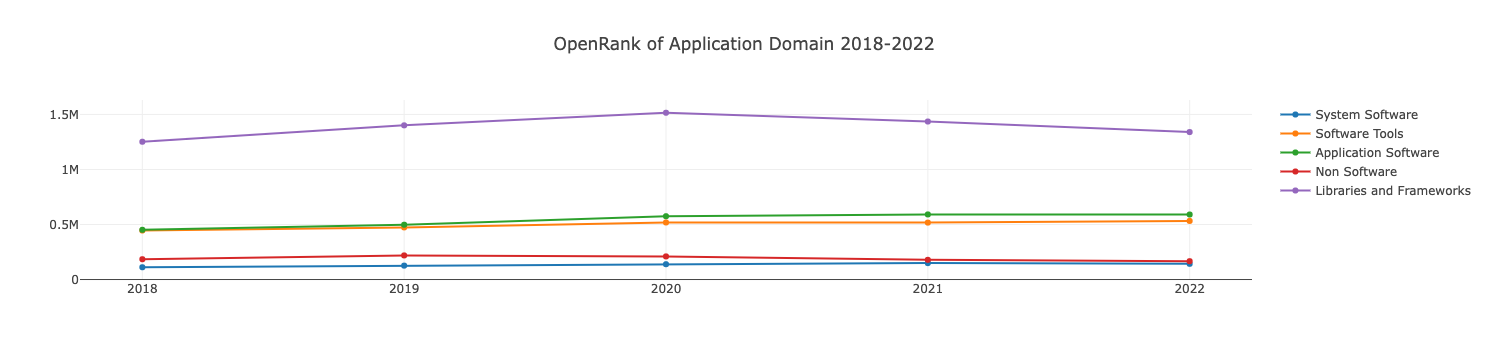

In [18]:
openDigger.render.plotly(appSubDomainOpenRankData.map(row => {
    return {
        x: years,
        y: row.openrank,
        name: row.name
    };
}), {title: `OpenRank of Application Domain 2018-2022`, xaxis: { type: 'category' }});

## 各子领域活跃度变化趋势

与影响力指标类似，libraries and framework 在活跃度方面也大幅领先其他领域。

In [19]:
var appSubDomainActivityData = []
var processSingleFieldActivity = (label) => {
    openDigger.index.activity.getRepoActivity({
        labelIntersect: [label],
        startYear, endYear: year, endMonth: 12,
        groupBy: 'Domain-0',
        groupTimeRange: 'year',
        order: 'DESC',
        limit: 100
    }).then(data => {
        appSubDomainActivityData.push(data[0])
    })
};

In [20]:
processSingleFieldActivity(':application_domain/libraries_and_frameworks')

In [21]:
processSingleFieldActivity(':application_domain/application_software')

In [22]:
processSingleFieldActivity(':application_domain/system_software')

In [23]:
processSingleFieldActivity(':application_domain/software_tools')

In [24]:
processSingleFieldActivity(':application_domain/non_software')

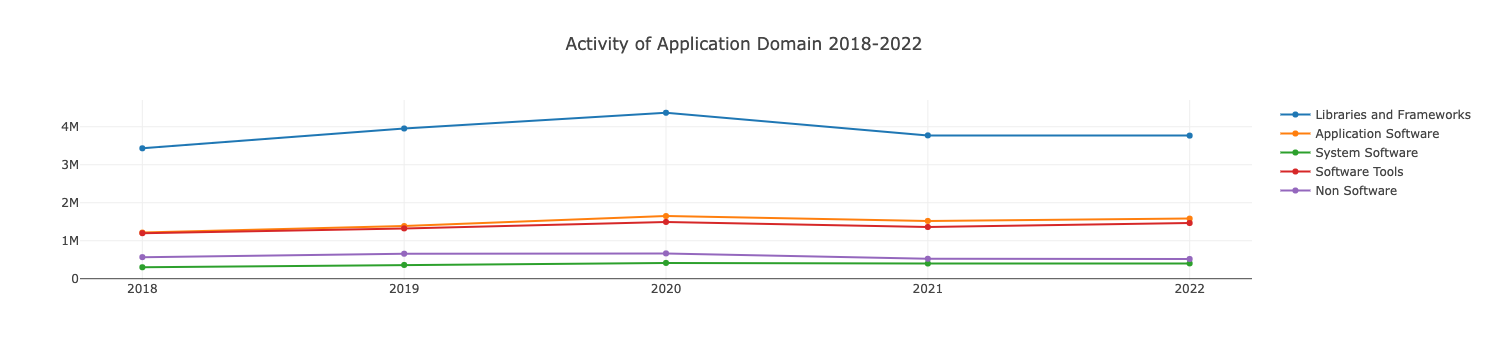

In [25]:
openDigger.render.plotly(appSubDomainActivityData.map(row => {
    return {
        x: years,
        y: row.activity,
        name: row.name
    };
}), {title: `Activity of Application Domain 2018-2022`, xaxis: { type: 'category' }});

### 近五年应用领域项目影响力 Top 10 项目变化趋势图

In [26]:
var processTechFieldData = (label, title) => {
    openDigger.index.openrank.getRepoOpenrank({
        startYear, endYear: year, startMonth: 1, endMonth: 12,
        groupTimeRange: 'year', order: 'DESC', labelIntersect: [label], limit: 10
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2018-2022`, xaxis: { type: 'category' }});
    });
};

### 依赖包和框架

flutter 项目常年稳居第一，百度 paddle 影响力持续增长。

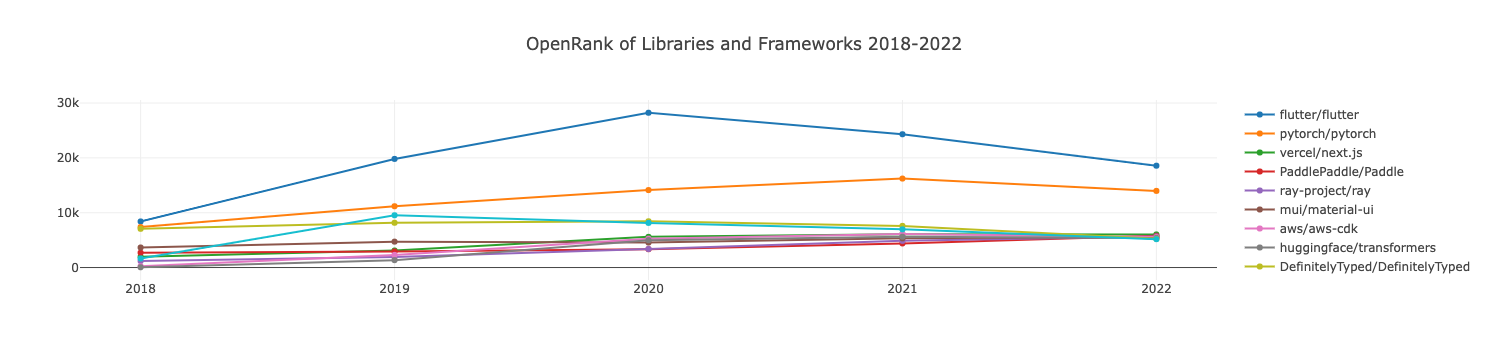

In [27]:
processTechFieldData(':application_domain/libraries_and_frameworks', 'Libraries and Frameworks');

### 应用软件

home-assistant/core 项目影响力增长明显并且与其他项目逐渐拉开差距，该领域下的 top 10 项目影响力均有不同程度的增长

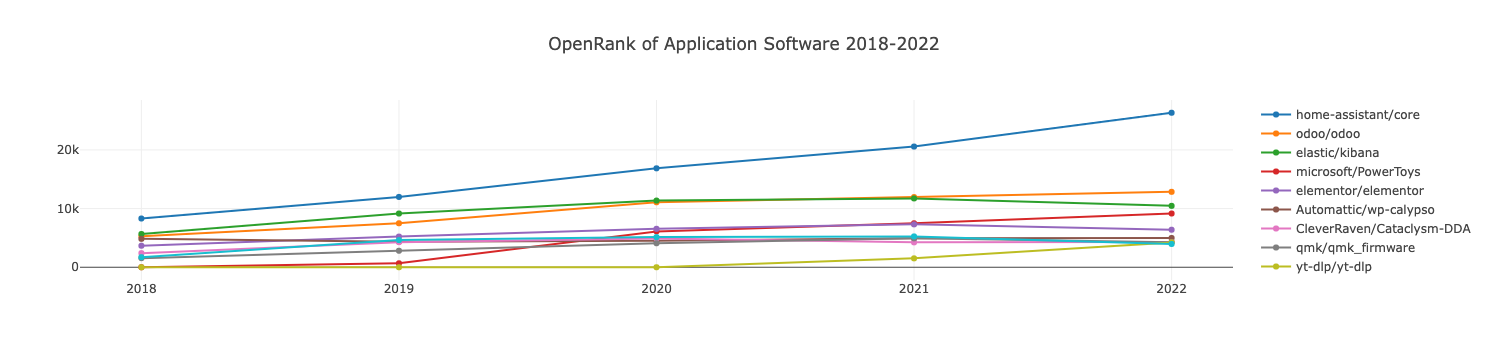

In [28]:
processTechFieldData(':application_domain/application_software', 'Application Software');

### 系统软件

nixpkgs 作为系统包管理工具是 Github 最活跃的项目之一，而 k8s 项目的影响力有所下降

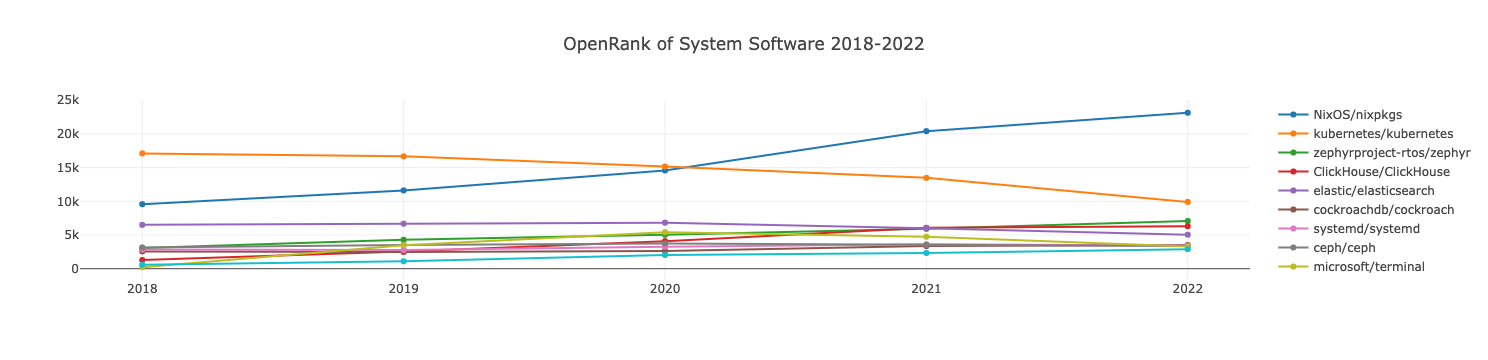

In [29]:
processTechFieldData(':application_domain/system_software', 'System Software');

### 软件工具

vscode 作为软件开发工具之一，深受广大开发者的喜爱，影响力常年位居第一，dotnet/runtime 项目在 2020 年影响力迅速增长位居第二。

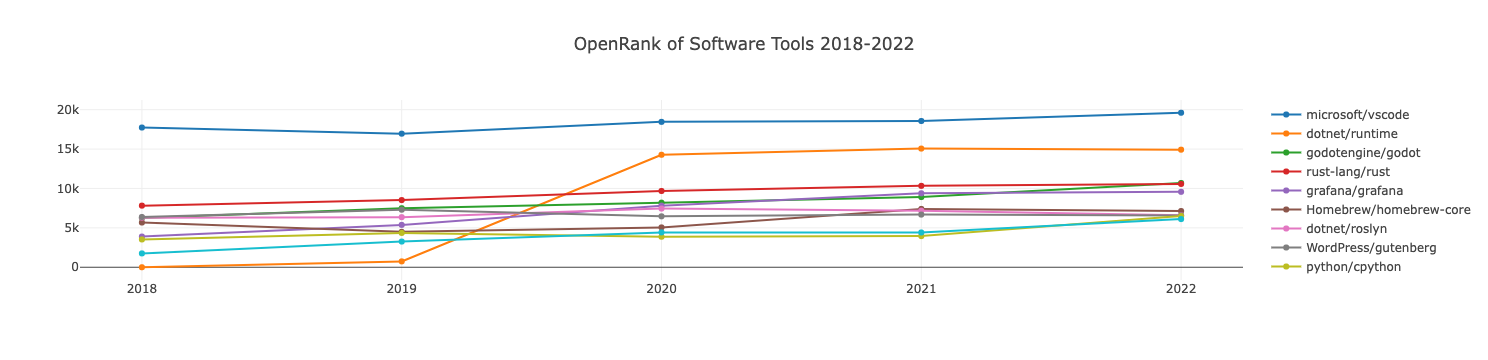

In [30]:
processTechFieldData(':application_domain/software_tools', 'Software Tools');

### 非软件

非软件类项目主要以项目文档为主，其中 azure-docs 影响力常年位居第一

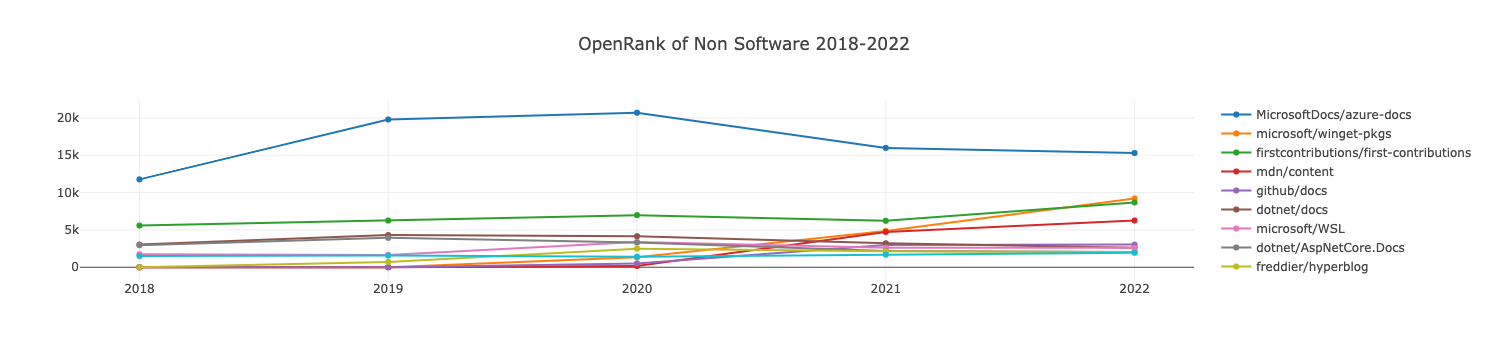

In [31]:
processTechFieldData(':application_domain/non_software', 'Non Software');

## 数据库领域项目分析

本小节从数据库领域角度出发，分别给出了数据库领域影响力和活跃度 Top 10 项目、数据库各子领域 Top 5 影响力和活跃度变化趋势以及近 5 年 Top 10 项目的影响力变化趋势

### 数据库领域影响力 Top 10

可以看出 Clickhouse 活跃度和影响力稳居第一，elasticsearch 其次。ClickHouse 是俄罗斯的 Yandex 于 2016 年开源的用于在线分析处理查询 MPP 架构的列式存储数 据库作为高性能的 OLAP 数据库，其性能十分优越，查询速度极快。

In [32]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: [':technology/database', 'Database'],
    startYear: year, endYear: year, endMonth: 12,
    groupTimeRange: 'year',
    order: 'DESC',
}).then(data => {
    console.table(data.map(d => {
    return {
        name: d.name,
        open_rank: d.openrank[0],
    };
}));
})

┌─────────┬─────────────────────────┬───────────┐
│ (index) │          name           │ open_rank │
├─────────┼─────────────────────────┼───────────┤
│    0    │ 'ClickHouse/ClickHouse' │  6305.42  │
│    1    │ 'elastic/elasticsearch' │  5041.45  │
│    2    │ 'cockroachdb/cockroach' │  3519.9   │
│    3    │     'trinodb/trino'     │  3452.85  │
│    4    │     'apache/spark'      │  3333.83  │
│    5    │ 'apache/shardingsphere' │  2900.41  │
│    6    │     'pingcap/tidb'      │  2538.82  │
│    7    │   'taosdata/TDengine'   │  2069.33  │
│    8    │     'apache/doris'      │  1996.13  │
│    9    │      'redis/redis'      │  1921.77  │
└─────────┴─────────────────────────┴───────────┘


### 数据库领域活跃度 Top 10

In [33]:
openDigger.index.activity.getRepoActivity({
    labelIntersect: [':technology/database', 'Database'],
    startYear: year, endYear: year, endMonth: 12,
    groupTimeRange: 'year',
    order: 'DESC',
}).then(data => {
    console.table(data.map(d => {
    return {
        name: d.name,
        activity: d.activity[0],
    };
}));
})

┌─────────┬─────────────────────────┬──────────┐
│ (index) │          name           │ activity │
├─────────┼─────────────────────────┼──────────┤
│    0    │ 'ClickHouse/ClickHouse' │ 13254.4  │
│    1    │ 'elastic/elasticsearch' │ 12656.86 │
│    2    │ 'cockroachdb/cockroach' │ 11730.81 │
│    3    │     'pingcap/tidb'      │ 10846.57 │
│    4    │     'trinodb/trino'     │ 10446.19 │
│    5    │  'StarRocks/starrocks'  │ 10128.47 │
│    6    │     'apache/spark'      │ 9805.52  │
│    7    │     'apache/doris'      │ 7989.99  │
│    8    │ 'apache/shardingsphere' │ 6378.13  │
│    9    │   'milvus-io/milvus'    │ 6319.83  │
└─────────┴─────────────────────────┴──────────┘


### 数据库领域项目 Top 10 影响力变化趋势

从下图可以看出 Clickhouse 双指标均在2022年上升至第一位，elasticsearch 和 spark 有一定的回落，排名较后的项目双指标均有不同程度的增长。

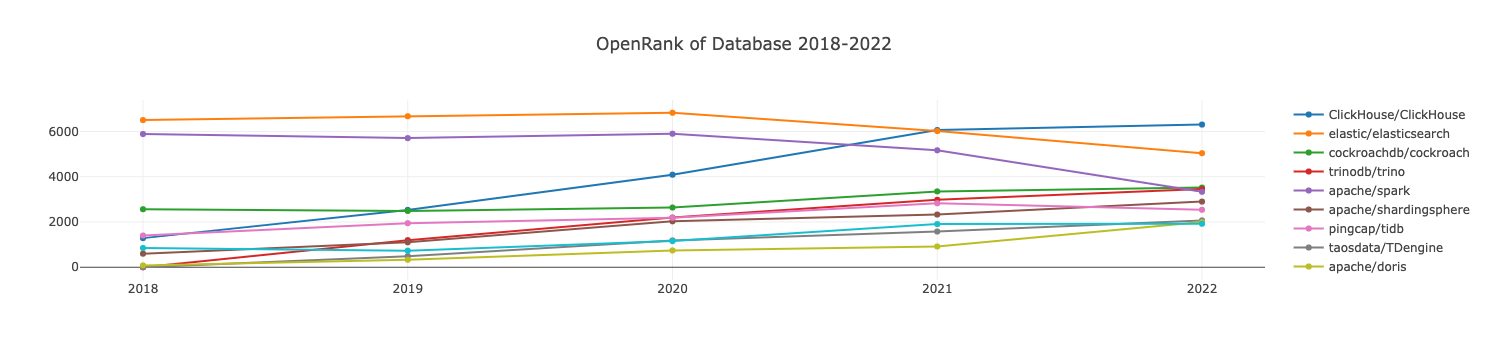

In [34]:
processTechFieldData(':technology/database', 'Database');

### 数据库领域项目 Top 10 活跃度变化趋势

从趋势图中可以看出，在 2018-2020 年项目之间的活跃度差距较为明显，在 2022 年竞争逐渐激烈，反映出数据库项目积极的发展。

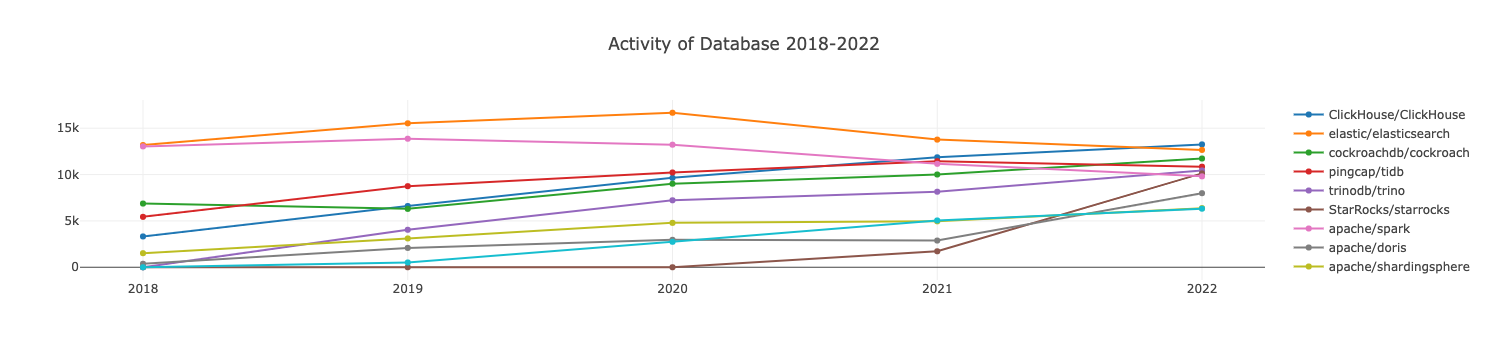

In [35]:
openDigger.index.activity.getRepoActivity({
    startYear, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', order: 'DESC', labelIntersect: [':technology/database'], limit: 10
}).then(data => {
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.activity,
            name: row.name
        };
    }), {title: `Activity of Database 2018-2022`, xaxis: { type: 'category' }});
});

### 数据库各子领域 Top 5 影响力变化趋势

本节给出了数据库下各个主要子领域的影响力变化趋势，从趋势图可以看到，关系型数据库连年位居第一且影响力不断增长，其他类型数据库影响力均处于稳定期。

In [36]:
var dbSubDomainOpenRankData = []
var processSingleFieldOpenRank = (label) => {
    openDigger.index.openrank.getRepoOpenrank({
        labelIntersect: [label],
        startYear, endYear: year, endMonth: 12,
        groupTimeRange: 'year',
        order: 'DESC',
        limit: 200,
    }).then(data => {
        var openrankArr = [0,0,0,0,0]
        data.forEach(item => {
            item.openrank.forEach((value, index) => openrankArr[index] += value)
        })
        dbSubDomainOpenRankData.push({
            name: label,
            openrank: openrankArr
        })
    })
};

In [37]:
processSingleFieldOpenRank(':technology/database/time_series')
processSingleFieldOpenRank(':technology/database/relational')
processSingleFieldOpenRank(':technology/database/key_value')
processSingleFieldOpenRank(':technology/database/document')
processSingleFieldOpenRank(':technology/database/search_engine')

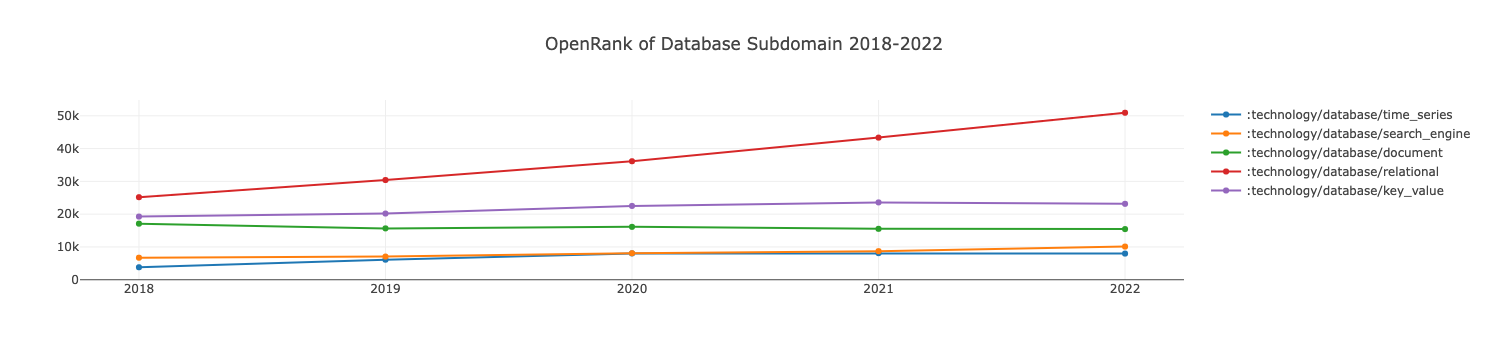

In [38]:
openDigger.render.plotly(dbSubDomainOpenRankData.map(row => {
    return {
        x: years,
        y: row.openrank,
        name: row.name
    };
}), {title: `OpenRank of Database Subdomain 2018-2022`, xaxis: { type: 'category' }});

### 数据库各子领域 Top 5 活跃度变化趋势

本节给出了数据库下各个主要子领域的活跃度变化趋势，从趋势图可以看到，关系型数据库活跃度在2022年增长迅速，其他类型数据库活跃度每年相对稳定。

In [39]:
var dbSubDomainActivityData = []
var processSingleFieldActivity = (label) => {
    openDigger.index.activity.getRepoActivity({
        labelIntersect: [label],
        startYear, endYear: year, endMonth: 12,
        groupTimeRange: 'year',
        order: 'DESC',
        limit: 200,
    }).then(data => {
        var activityArr = [0,0,0,0,0]
        data.forEach(item => {
            item.activity.forEach((value, index) => activityArr[index] += value)
        })
        dbSubDomainActivityData.push({
            name: label,
            activity: activityArr
        })
    })
};

In [40]:
processSingleFieldActivity(':technology/database/time_series')
processSingleFieldActivity(':technology/database/relational')
processSingleFieldActivity(':technology/database/key_value')
processSingleFieldActivity(':technology/database/document')
processSingleFieldActivity(':technology/database/search_engine')

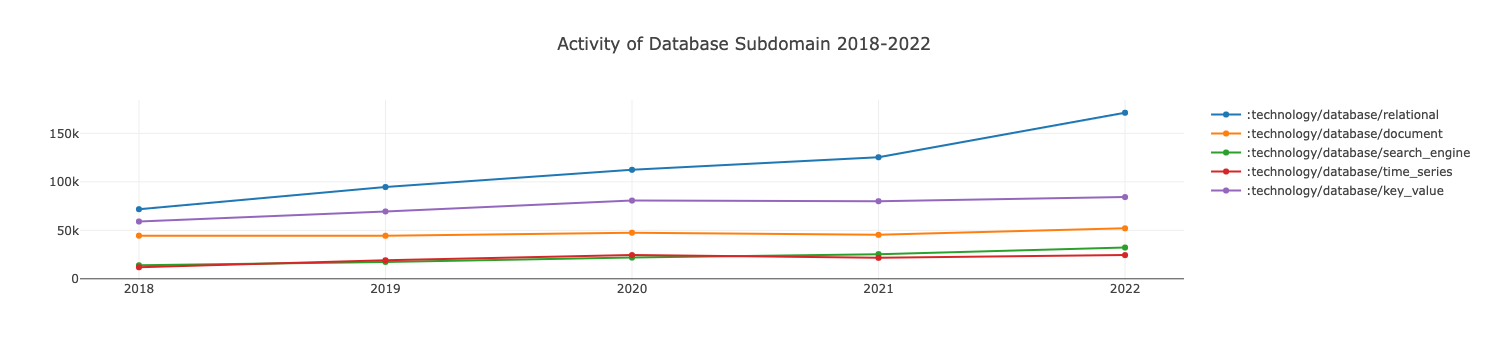

In [41]:
openDigger.render.plotly(dbSubDomainActivityData.map(row => {
    return {
        x: years,
        y: row.activity,
        name: row.name
    };
}), {title: `Activity of Database Subdomain 2018-2022`, xaxis: { type: 'category' }});

## 编程语言 Top 10 排行榜

从下表中可以看出 JavaScript 仍然是当前最热门的编程语言，TypeScript 紧随其后。

In [42]:
openDigger.driver.clickhouse.query(`SELECT DISTINCT repo_language, COUNT(*) AS language_count FROM gh_events WHERE repo_language != '' 
AND toYear(created_at) = ${year} GROUP BY repo_language ORDER BY language_count DESC LIMIT 10`, { format: 'JSONEachRow' }).then(data => {
    console.table(data)
});

┌─────────┬───────────────┬────────────────┐
│ (index) │ repo_language │ language_count │
├─────────┼───────────────┼────────────────┤
│    0    │ 'JavaScript'  │   '34370089'   │
│    1    │ 'TypeScript'  │   '26092393'   │
│    2    │   'Python'    │   '15768989'   │
│    3    │    'Java'     │   '12722892'   │
│    4    │     'Go'      │   '9546976'    │
│    5    │    'HTML'     │   '8663963'    │
│    6    │    'Ruby'     │   '6836565'    │
│    7    │     'C++'     │   '5171331'    │
│    8    │     'C#'      │   '4625525'    │
│    9    │     'PHP'     │   '4387705'    │
└─────────┴───────────────┴────────────────┘
